In [ ]:
# Step 1: Import Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# Load the dataset
data = pd.read_csv('twitchdata-update.csv')

In [ ]:
# Step 3: Exploratory Data Analysis
print("Dataset Overview:\n", data.info())
print("\nSummary Statistics:\n", data.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Channel               1000 non-null   object
 1   Watch time(Minutes)   1000 non-null   int64 
 2   Stream time(minutes)  1000 non-null   int64 
 3   Peak viewers          1000 non-null   int64 
 4   Average viewers       1000 non-null   int64 
 5   Followers             1000 non-null   int64 
 6   Followers gained      1000 non-null   int64 
 7   Views gained          1000 non-null   int64 
 8   Partnered             1000 non-null   bool  
 9   Mature                1000 non-null   bool  
 10  Language              1000 non-null   object
dtypes: bool(2), int64(7), object(2)
memory usage: 72.4+ KB
Dataset Overview:
 None

Summary Statistics:
        Watch time(Minutes)  Stream time(minutes)   Peak viewers  \
count         1.000000e+03           1000.000000    1000.000000   
mean

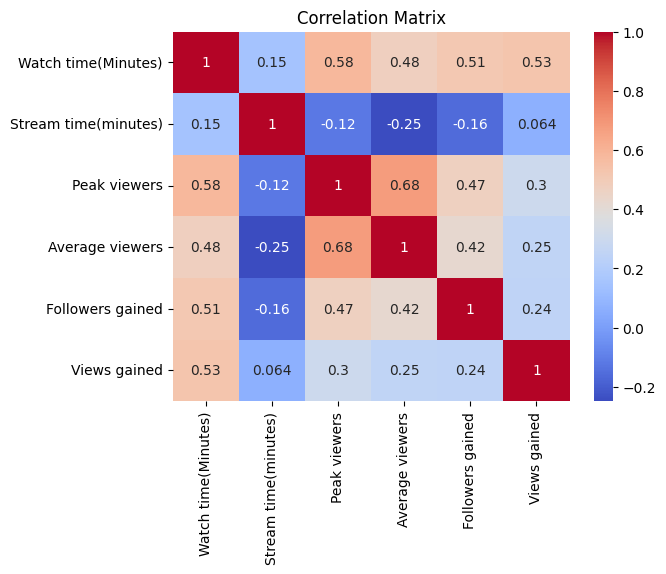

In [ ]:
# Step 4: Correlation Analysis
correlation_matrix = data[['Watch time(Minutes)', 'Stream time(minutes)', 'Peak viewers',
                           'Average viewers', 'Followers gained', 'Views gained']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

<ipython-input-7-b38e6021f748>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Channel', y='Followers gained', data=data, palette='viridis')
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 54413 (\N{HANGUL SYLLABLE PUNG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50900 (\N{HANGUL SYLLABLE WEOL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 47049 (\N{HANGUL SYLLABLE RYANG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 54620 (\N{HANGUL SYLLABLE HAN}) m

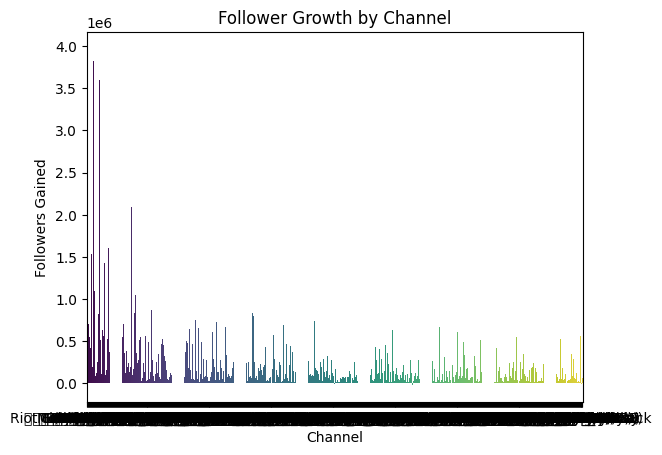

In [ ]:
# Step 5: Visualize Follower Growth
sns.barplot(x='Channel', y='Followers gained', data=data, palette='viridis')
plt.title('Follower Growth by Channel')
plt.ylabel('Followers Gained')
plt.show()

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 54413 (\N{HANGUL SYLLABLE PUNG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50900 (\N{HANGUL SYLLABLE WEOL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 47049 (\N{HANGUL SYLLABLE RYANG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 54620 (\N{HANGUL SYLLABLE HAN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 46041 (\N{HANGUL SYLLABLE DONG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-pack

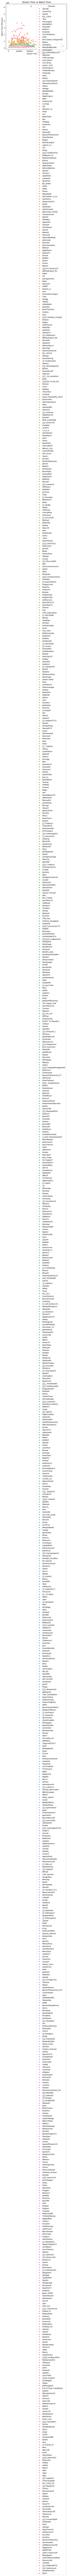

In [ ]:
# Step 6: Relationship Between Watch Time and Engagement
sns.scatterplot(x='Stream time(minutes)', y='Watch time(Minutes)', hue='Channel', data=data)
plt.title('Stream Time vs Watch Time')
plt.xlabel('Stream Time (Minutes)')
plt.ylabel('Watch Time (Minutes)')
plt.show()

In [ ]:
# Step 1: Import Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import shap

In [ ]:
# Step 3: Data Preprocessing
# Convert categorical variables to numeric
data['Partnered'] = data['Partnered'].astype(int)
data['Mature'] = data['Mature'].astype(int)
data['Language'] = data['Language'].astype('category').cat.codes

In [ ]:
# Split features and target
X = data[['Watch time(Minutes)', 'Stream time(minutes)', 'Peak viewers',
          'Average viewers', 'Views gained', 'Partnered', 'Mature', 'Language']]
y = data['Followers gained']

In [ ]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Step 4: Machine Learning Model
# Create a pipeline for scaling and regression
scaler = StandardScaler()
model = RandomForestRegressor(n_estimators=100, random_state=42)
pipeline = Pipeline(steps=[('scaler', scaler), ('model', model)])
pipeline.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('model', RandomForestRegressor(random_state=42))])

In [ ]:
# Predictions
y_pred = pipeline.predict(X_test)

In [ ]:
# Step 5: Evaluation
print(f"Mean Squared Error: {mean_squared_error(y_test, y_pred):.2f}")
print(f"R-squared: {r2_score(y_test, y_pred):.2f}")

Mean Squared Error: 60594384668.03
R-squared: 0.44


<ipython-input-28-f54229887ac7>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_importances, y=features, palette="coolwarm")


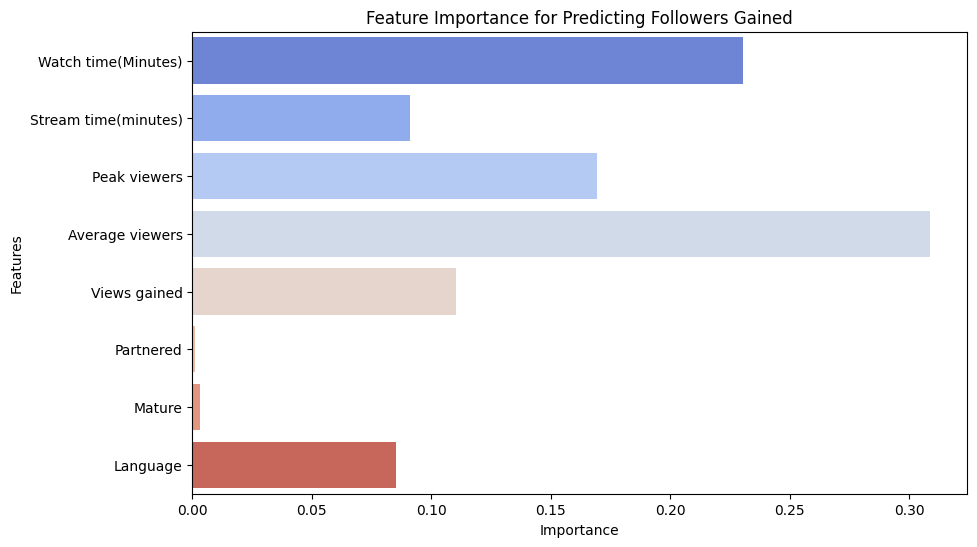

In [ ]:
# Step 6: Feature Importance Visualization
feature_importances = model.feature_importances_
features = X.columns
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importances, y=features, palette="coolwarm")
plt.title('Feature Importance for Predicting Followers Gained')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.show()

In [ ]:
# Step 7: SHAP Analysis for Interpretability
explainer = shap.Explainer(model, X_train)
shap_values = explainer(X_test)

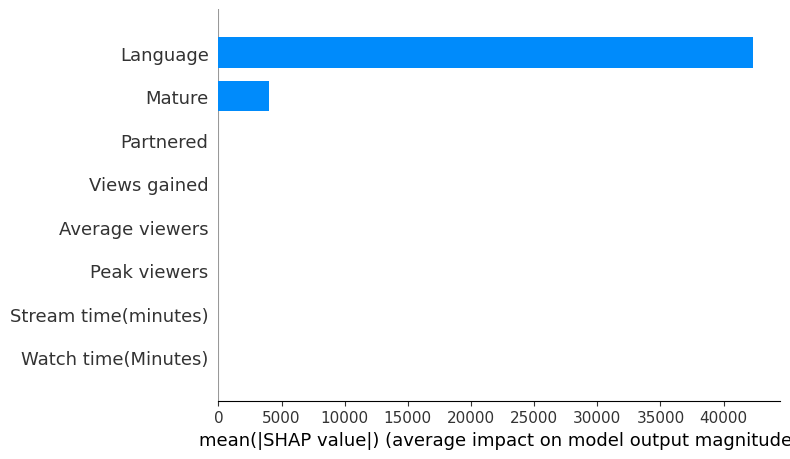

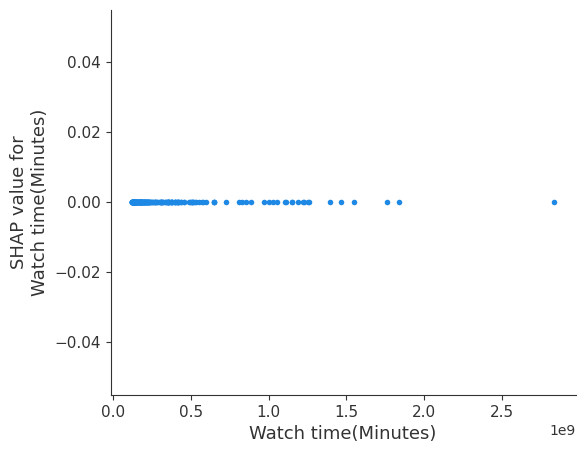

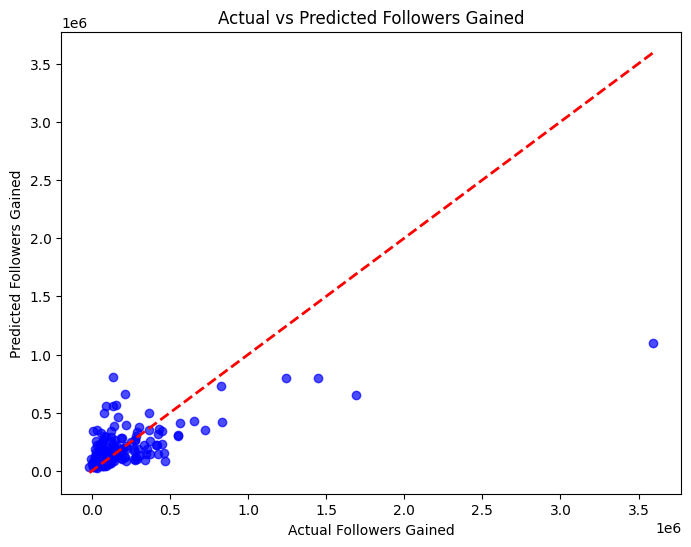

In [ ]:
# SHAP Summary Plot
shap.summary_plot(shap_values, X_test, plot_type="bar")

# SHAP Dependence Plot for Key Features
# Convert SHAP values to NumPy array
shap_values_np = shap_values.values

# Access the desired feature values as a NumPy array
feature_values = X_test["Watch time(Minutes)"].values

# Now create the dependence plot
shap.dependence_plot("Watch time(Minutes)", shap_values_np, X_test, interaction_index=None)
# interaction_index=None to avoid further issues with data type


# Step 8: Visualizing Model Fit
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.7, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', linewidth=2)
plt.title('Actual vs Predicted Followers Gained')
plt.xlabel('Actual Followers Gained')
plt.ylabel('Predicted Followers Gained')
plt.show()

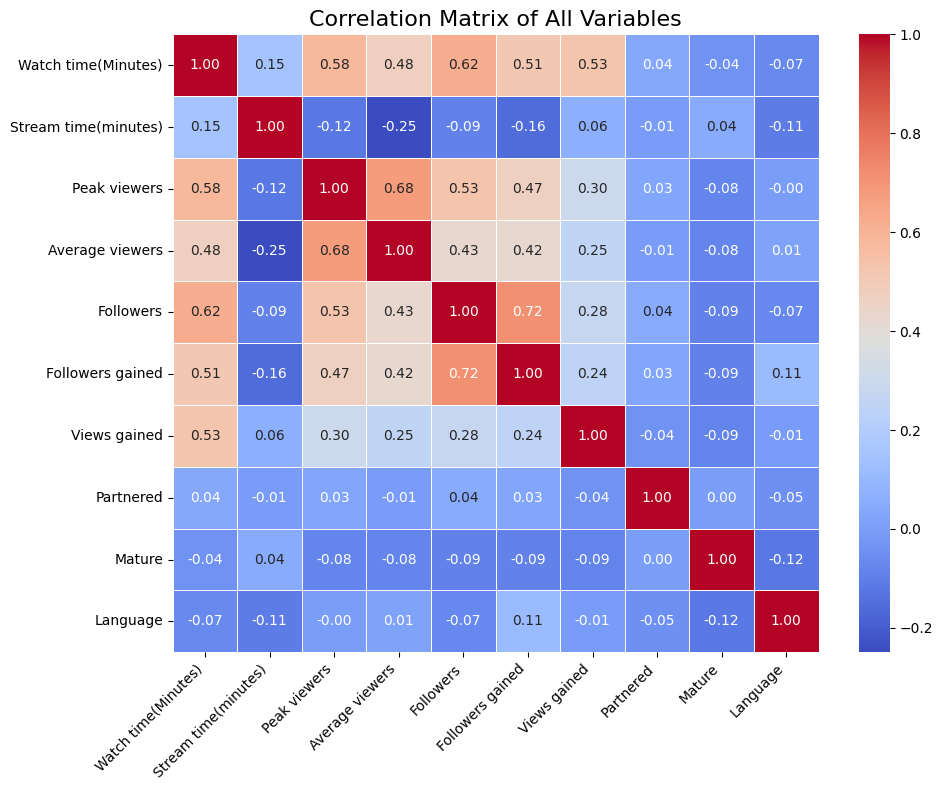

In [ ]:
# Step 1: Enhanced Correlation Analysis
correlation_matrix = data.select_dtypes(include=np.number).corr()  # Include only numeric variables
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix of All Variables", fontsize=16)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()

<ipython-input-35-b44acb8afce1>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Channel', y='Followers gained', data=data, palette='viridis')
<ipython-input-35-b44acb8afce1>:9: UserWarning: Glyph 54413 (\N{HANGUL SYLLABLE PUNG}) missing from current font.
  plt.tight_layout()
<ipython-input-35-b44acb8afce1>:9: UserWarning: Glyph 50900 (\N{HANGUL SYLLABLE WEOL}) missing from current font.
  plt.tight_layout()
<ipython-input-35-b44acb8afce1>:9: UserWarning: Glyph 47049 (\N{HANGUL SYLLABLE RYANG}) missing from current font.
  plt.tight_layout()
<ipython-input-35-b44acb8afce1>:9: UserWarning: Glyph 54620 (\N{HANGUL SYLLABLE HAN}) missing from current font.
  plt.tight_layout()
<ipython-input-35-b44acb8afce1>:9: UserWarning: Glyph 46041 (\N{HANGUL SYLLABLE DONG}) missing from current font.
  plt.tight_layout()
<ipython-input-35-b44acb8afc

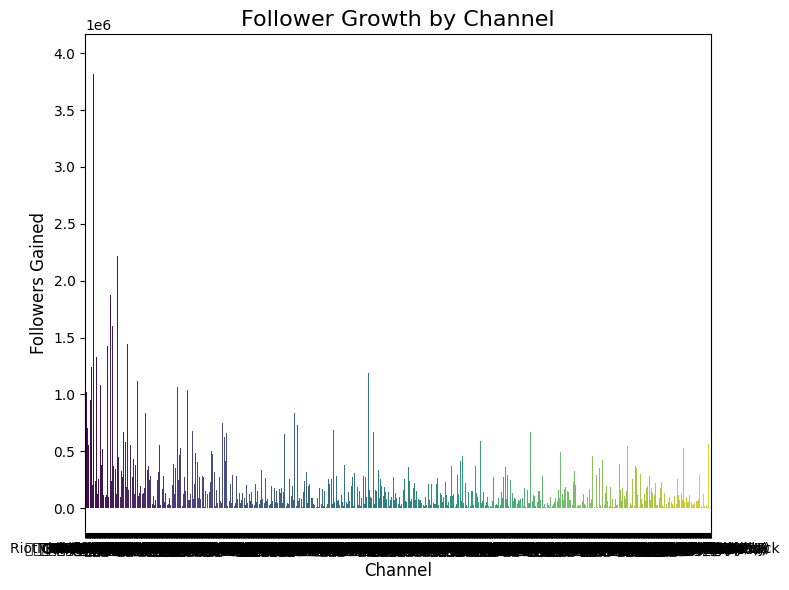

In [ ]:
# Step 2: Visualize Follower Growth
plt.figure(figsize=(8, 6))
sns.barplot(x='Channel', y='Followers gained', data=data, palette='viridis')
plt.title('Follower Growth by Channel', fontsize=16)
plt.ylabel('Followers Gained', fontsize=12)
plt.xlabel('Channel', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()

<ipython-input-38-bee6bdc19db6>:7: UserWarning: Glyph 54413 (\N{HANGUL SYLLABLE PUNG}) missing from current font.
  plt.tight_layout()
<ipython-input-38-bee6bdc19db6>:7: UserWarning: Glyph 50900 (\N{HANGUL SYLLABLE WEOL}) missing from current font.
  plt.tight_layout()
<ipython-input-38-bee6bdc19db6>:7: UserWarning: Glyph 47049 (\N{HANGUL SYLLABLE RYANG}) missing from current font.
  plt.tight_layout()
<ipython-input-38-bee6bdc19db6>:7: UserWarning: Glyph 54620 (\N{HANGUL SYLLABLE HAN}) missing from current font.
  plt.tight_layout()
<ipython-input-38-bee6bdc19db6>:7: UserWarning: Glyph 46041 (\N{HANGUL SYLLABLE DONG}) missing from current font.
  plt.tight_layout()
<ipython-input-38-bee6bdc19db6>:7: UserWarning: Glyph 49689 (\N{HANGUL SYLLABLE SUG}) missing from current font.
  plt.tight_layout()
<ipython-input-38-bee6bdc19db6>:7: UserWarning: Glyph 49436 (\N{HANGUL SYLLABLE SEO}) missing from current font.
  plt.tight_layout()
<ipython-input-38-bee6bdc19db6>:7: UserWarning: Glyph 493

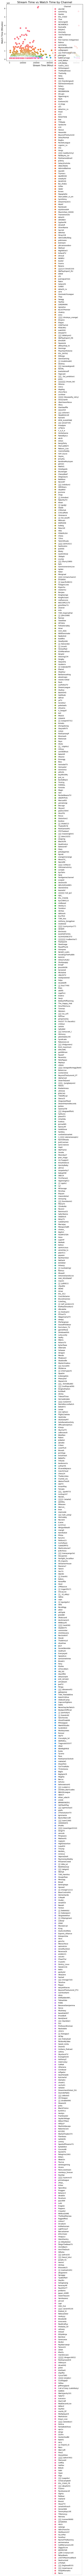

In [ ]:
# Step 3: Relationship Between Watch Time and Stream Time
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Stream time(minutes)', y='Watch time(Minutes)', hue='Channel', data=data, s=100)
plt.title('Stream Time vs Watch Time by Channel', fontsize=16)
plt.xlabel('Stream Time (Minutes)', fontsize=12)
plt.ylabel('Watch Time (Minutes)', fontsize=12)
plt.tight_layout()
plt.show()

<ipython-input-39-0469e05c2ef6>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Channel', y='Average viewers', data=data, palette='plasma')
<ipython-input-39-0469e05c2ef6>:9: UserWarning: Glyph 54413 (\N{HANGUL SYLLABLE PUNG}) missing from current font.
  plt.tight_layout()
<ipython-input-39-0469e05c2ef6>:9: UserWarning: Glyph 50900 (\N{HANGUL SYLLABLE WEOL}) missing from current font.
  plt.tight_layout()
<ipython-input-39-0469e05c2ef6>:9: UserWarning: Glyph 47049 (\N{HANGUL SYLLABLE RYANG}) missing from current font.
  plt.tight_layout()
<ipython-input-39-0469e05c2ef6>:9: UserWarning: Glyph 54620 (\N{HANGUL SYLLABLE HAN}) missing from current font.
  plt.tight_layout()
<ipython-input-39-0469e05c2ef6>:9: UserWarning: Glyph 46041 (\N{HANGUL SYLLABLE DONG}) missing from current font.
  plt.tight_layout()
<ipython-input-39-0469e05c2ef6

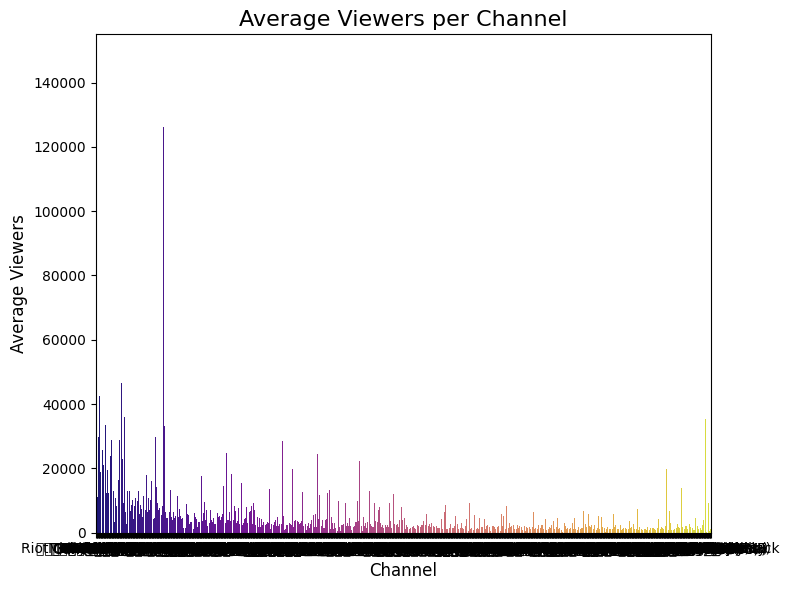

In [ ]:
# Step 4: Engagement Analysis
plt.figure(figsize=(8, 6))
sns.barplot(x='Channel', y='Average viewers', data=data, palette='plasma')
plt.title('Average Viewers per Channel', fontsize=16)
plt.ylabel('Average Viewers', fontsize=12)
plt.xlabel('Channel', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()

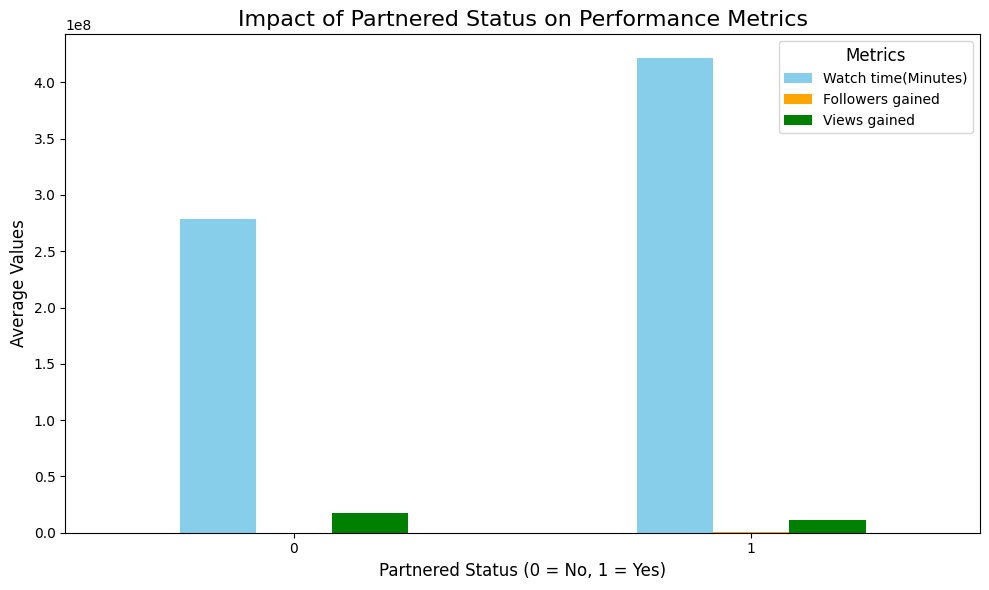

In [ ]:
# Step 5: Impact of "Partnered" Status
partnered_group = data.groupby('Partnered')[['Watch time(Minutes)', 'Followers gained', 'Views gained']].mean()
# Excluding 'Channel' from the mean calculation as it's non-numeric - Now explicitly selecting numeric columns before groupby
partnered_group.plot(kind='bar', figsize=(10, 6), color=['skyblue', 'orange', 'green'])
plt.title('Impact of Partnered Status on Performance Metrics', fontsize=16)
plt.ylabel('Average Values', fontsize=12)
plt.xlabel('Partnered Status (0 = No, 1 = Yes)', fontsize=12)
plt.xticks(rotation=0, fontsize=10)
plt.yticks(fontsize=10)
plt.legend(fontsize=10, title="Metrics", title_fontsize=12)
plt.tight_layout()
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1615: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=x, y=y, **kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1615: UserWarning: Ignoring `palette` because no `hue` variable has be

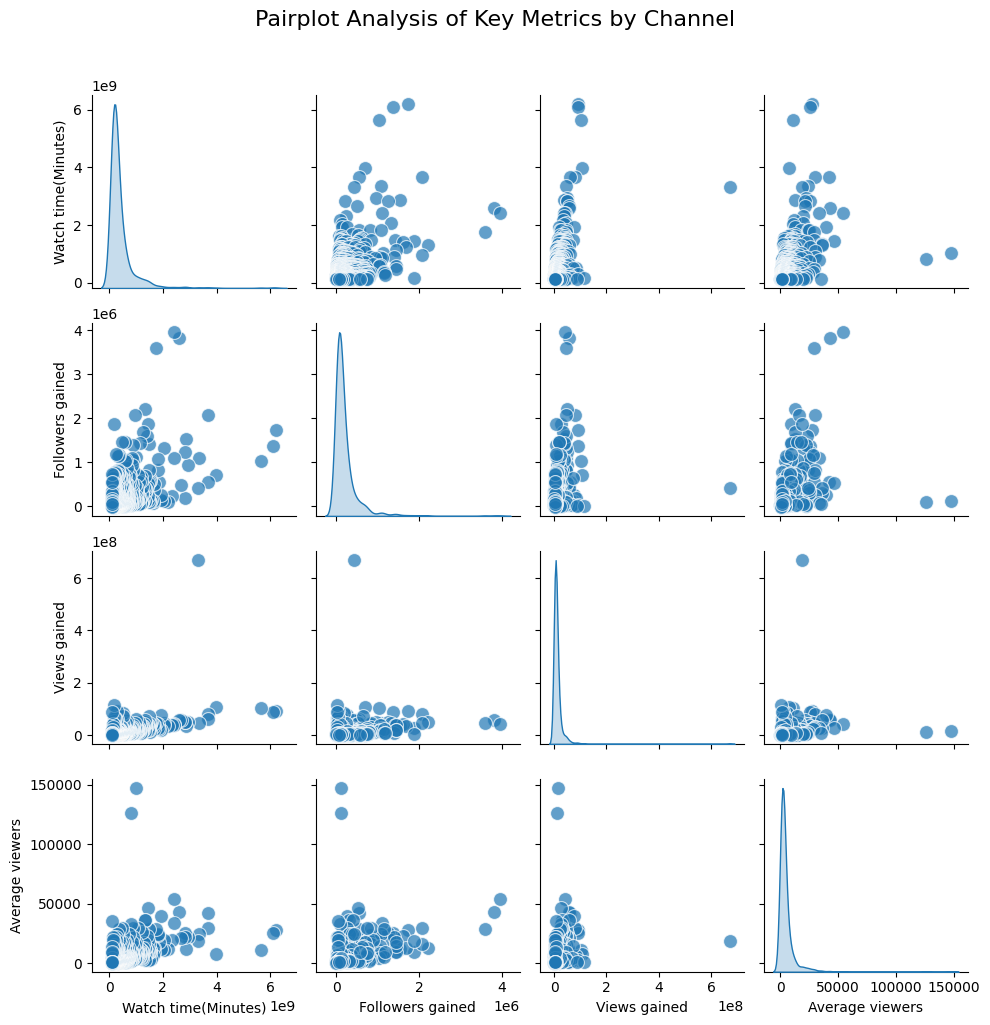

In [ ]:
# Step 6: Pairplot Analysis for Key Performance Drivers
sns.pairplot(
    data,
    vars=['Watch time(Minutes)', 'Followers gained', 'Views gained', 'Average viewers'],
    diag_kind='kde',
    palette='coolwarm',
    plot_kws={'alpha': 0.7, 's': 100}
)
plt.suptitle('Pairplot Analysis of Key Metrics by Channel', fontsize=16, y=1.02)
plt.tight_layout()
plt.show()

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error
from math import sqrt
import warnings

warnings.filterwarnings("ignore")

# Step 1: Preprocessing the Data
# Drop the 'Channel' column and set 'Followers gained' as the target variable
X = data.drop(columns=['Channel', 'Followers gained'])
y = data['Followers gained']

# Convert categorical variables into dummy variables (if any)
X = pd.get_dummies(X, drop_first=True)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 2: Initialize Models
models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(random_state=42),
    "Support Vector Machine": SVR(),
    "Artificial Neural Network": MLPRegressor(random_state=42, max_iter=500)
}

# Step 3: Train and Evaluate Models
results = {}
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    rmse = sqrt(mse)
    results[model_name] = {"MSE": mse, "RMSE": rmse}

# Step 4: Display Results
print("Model Performance:")
for model_name, metrics in results.items():
    print(f"{model_name} - MSE: {metrics['MSE']:.2f}, RMSE: {metrics['RMSE']:.2f}")


Model Performance:
Linear Regression - MSE: 65755905837.03, RMSE: 256429.14
Random Forest - MSE: 41659956449.31, RMSE: 204107.71
Support Vector Machine - MSE: 113782342080.81, RMSE: 337316.38
Artificial Neural Network - MSE: 64395815203.45, RMSE: 253763.31


In [ ]:
from sklearn.metrics import r2_score

# Step 3: Train and Evaluate Models with R^2
results = {}
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    rmse = sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    results[model_name] = {"MSE": mse, "RMSE": rmse, "R^2": r2}

# Step 4: Display Results
print("Model Performance:")
for model_name, metrics in results.items():
    print(f"{model_name} - MSE: {metrics['MSE']:.2f}, RMSE: {metrics['RMSE']:.2f}, R^2: {metrics['R^2']:.2f}")


Model Performance:
Linear Regression - MSE: 65755905837.03, RMSE: 256429.14, R^2: 0.39
Random Forest - MSE: 41659956449.31, RMSE: 204107.71, R^2: 0.61
Support Vector Machine - MSE: 113782342080.81, RMSE: 337316.38, R^2: -0.06
Artificial Neural Network - MSE: 64395815203.45, RMSE: 253763.31, R^2: 0.40


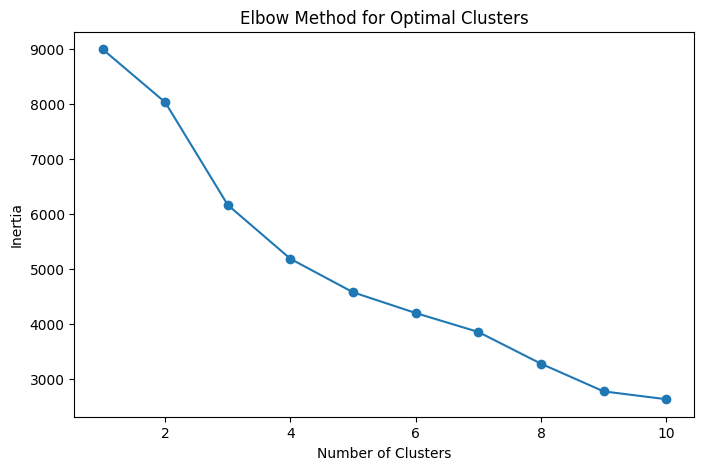

Training Confusion Matrix:
[[155   0   0   0]
 [  0 482   2   4]
 [  3   2  38   0]
 [  5   7   0   2]]
Testing Confusion Matrix:
[[ 64   0   0   0]
 [  0 208   0   1]
 [  3   2  13   1]
 [  0   8   0   0]]


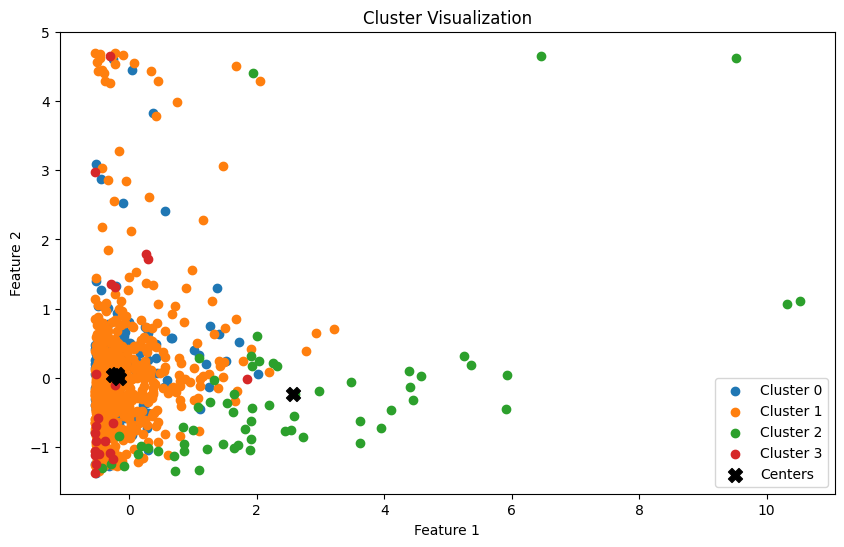

QhullError for cluster 0. Skipping polygon.
QhullError for cluster 1. Skipping polygon.
QhullError for cluster 2. Skipping polygon.
QhullError for cluster 3. Skipping polygon.


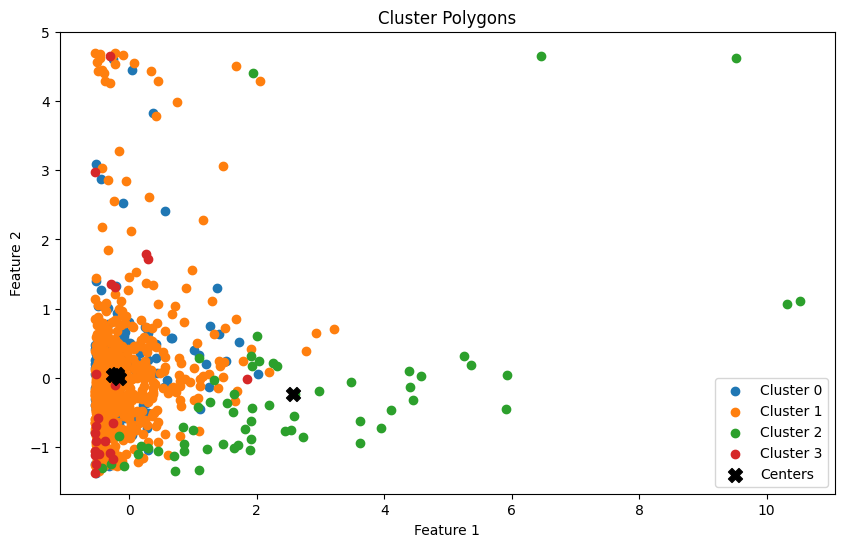

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import train_test_split
from scipy.spatial import ConvexHull, QhullError # Import QhullError
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('twitchdata-update.csv')

# Convert categorical variables to numeric
data['Partnered'] = data['Partnered'].astype(int)
data['Mature'] = data['Mature'].astype(int)
data['Language'] = data['Language'].astype('category').cat.codes

# Select numerical and categorical columns for clustering
columns = ['Watch time(Minutes)', 'Stream time(minutes)', 'Peak viewers', 'Average viewers',
           'Followers gained', 'Views gained', 'Partnered', 'Mature', 'Language']
data_selected = data[columns]

# Standardize the data
scaler = StandardScaler()
data_standardized = scaler.fit_transform(data_selected)

# Compute dissimilarity matrix (Euclidean distance)
from scipy.spatial.distance import pdist, squareform
distance_matrix = squareform(pdist(data_standardized, metric='euclidean'))

# Estimate the optimal number of clusters using the Elbow Method
inertia = []
k_values = range(1, 11)
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_standardized)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(k_values, inertia, marker='o')
plt.title('Elbow Method for Optimal Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

# Apply KMeans clustering with optimal k (choose based on the elbow plot)
k_opt = 4  # Example value; update based on the elbow plot
kmeans = KMeans(n_clusters=k_opt, random_state=42)
data['Cluster'] = kmeans.fit_predict(data_standardized)

# Data partition into training and testing datasets
X = data_selected
y = data['Cluster']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Fit LDA model on the training data
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)

# Predict cluster assignments on training data
train_predictions = lda.predict(X_train)
train_conf_matrix = confusion_matrix(y_train, train_predictions)
print("Training Confusion Matrix:")
print(train_conf_matrix)

# Predict cluster assignments on testing data
test_predictions = lda.predict(X_test)
test_conf_matrix = confusion_matrix(y_test, test_predictions)
print("Testing Confusion Matrix:")
print(test_conf_matrix)

# Visualize clusters
plt.figure(figsize=(10, 6))
for cluster in range(k_opt):
    cluster_points = data_standardized[data['Cluster'] == cluster]
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], label=f'Cluster {cluster}')

# Mark cluster centers
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', marker='X', s=100, label='Centers')
plt.title('Cluster Visualization')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()

# Plot polygons of clusters
# Plot polygons of clusters
plt.figure(figsize=(10, 6))
for cluster in range(k_opt):
    cluster_points = data_standardized[data['Cluster'] == cluster]
    # Check if enough points for ConvexHull
    if cluster_points.shape[0] >= 3:  # At least 3 points needed
        try:
            hull = ConvexHull(cluster_points)
            for simplex in hull.simplices:
                plt.plot(cluster_points[simplex, 0], cluster_points[simplex, 1], 'k-')
        except QhullError: # Catch the specific exception
            # Handle QhullError, e.g., skip or use a different visualization
            print(f"QhullError for cluster {cluster}. Skipping polygon.")
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], label=f'Cluster {cluster}')

plt.scatter(centers[:, 0], centers[:, 1], c='black', marker='X', s=100, label='Centers')
plt.title('Cluster Polygons')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()

In [ ]:
from sklearn.metrics import accuracy_score

# Calculate training accuracy
train_accuracy = accuracy_score(y_train, train_predictions)
print(f"Training Accuracy: {train_accuracy:.2f}")

# Calculate testing accuracy
test_accuracy = accuracy_score(y_test, test_predictions)
print(f"Testing Accuracy: {test_accuracy:.2f}")

Training Accuracy: 0.97
Testing Accuracy: 0.95


In [ ]:
# Feature importance for clusters
cluster_features = pd.DataFrame(kmeans.cluster_centers_, columns=columns)
print("Cluster Centers (Feature Importance):")
print(cluster_features)

# Assign names based on analysis of cluster centers
cluster_names = {
    0: "High Viewers & Followers",
    1: "Moderate Engagement",
    2: "Low Engagement",
    3: "High Stream Time"
}

# Map cluster names to the data
data['Cluster Name'] = data['Cluster'].map(cluster_names)


Cluster Centers (Feature Importance):
   Watch time(Minutes)  Stream time(minutes)  Peak viewers  Average viewers  \
0            -0.201532              0.048024     -0.240707        -0.205823   
1            -0.157483              0.004425     -0.162140        -0.146809   
2             2.572792             -0.236117      2.739520         2.356186   
3            -0.255083              0.047161     -0.187434         0.059892   

   Followers gained  Views gained  Partnered    Mature  Language  
0         -0.221384     -0.204823   0.149983  1.829707 -0.207804  
1         -0.133946     -0.086958   0.149983 -0.546536  0.062321  
2          2.352775      1.617511   0.149983 -0.316577 -0.076517  
3         -0.183121      0.235447  -6.667424 -0.006481  0.309785  


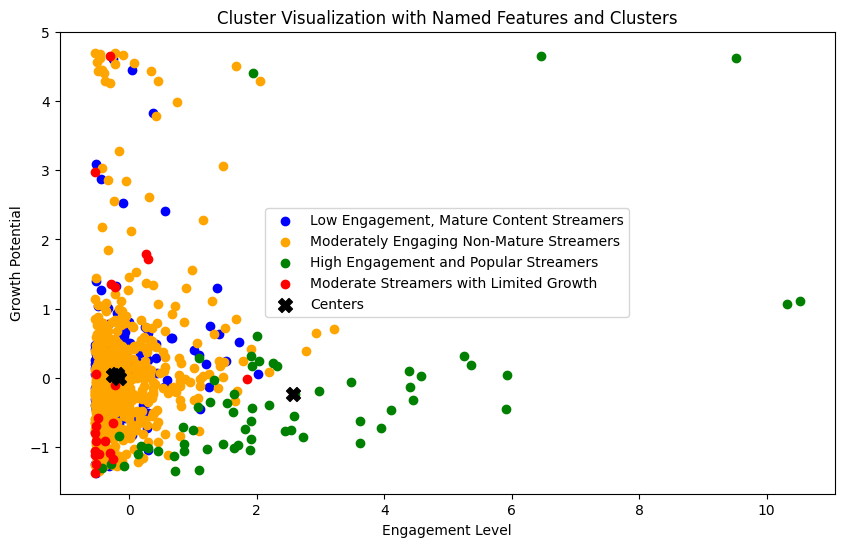

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Rename Feature 1 and Feature 2 for better understanding
feature_1_name = "Engagement Level"  # Interpreted as combined metrics of peak/average viewers
feature_2_name = "Growth Potential"  # Interpreted as combined metrics of followers/views gained

# Rename clusters based on interpretation
cluster_names = {
    0: "Low Engagement, Mature Content Streamers",
    1: "Moderately Engaging Non-Mature Streamers",
    2: "High Engagement and Popular Streamers",
    3: "Moderate Streamers with Limited Growth"
}
data['Cluster Name'] = data['Cluster'].map(cluster_names)

# Visualization of clusters with proper labels
plt.figure(figsize=(10, 6))
colors = ['blue', 'orange', 'green', 'red']

for cluster, color in enumerate(colors):
    cluster_points = data_standardized[data['Cluster'] == cluster]
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], label=cluster_names[cluster], color=color)

# Mark cluster centers
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', marker='X', s=100, label='Centers')

# Set plot titles and labels
plt.title('Cluster Visualization with Named Features and Clusters')
plt.xlabel(feature_1_name)
plt.ylabel(feature_2_name)
plt.legend()
plt.show()

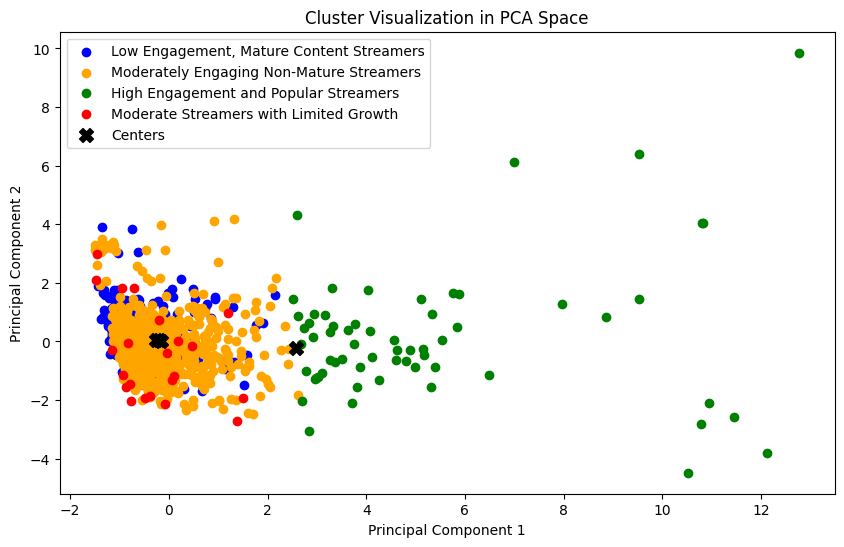

In [ ]:
from sklearn.decomposition import PCA

# Perform PCA for dimensionality reduction
pca = PCA(n_components=2)  # Reduce to 2 dimensions for visualization
data_pca = pca.fit_transform(data_standardized)

# Visualize clusters in the reduced PCA space
plt.figure(figsize=(10, 6))
for cluster, color in enumerate(colors):
    cluster_points = data_pca[data['Cluster'] == cluster]
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], label=cluster_names[cluster], color=color)

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='black', marker='X', s=100, label='Centers')
plt.title('Cluster Visualization in PCA Space')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()


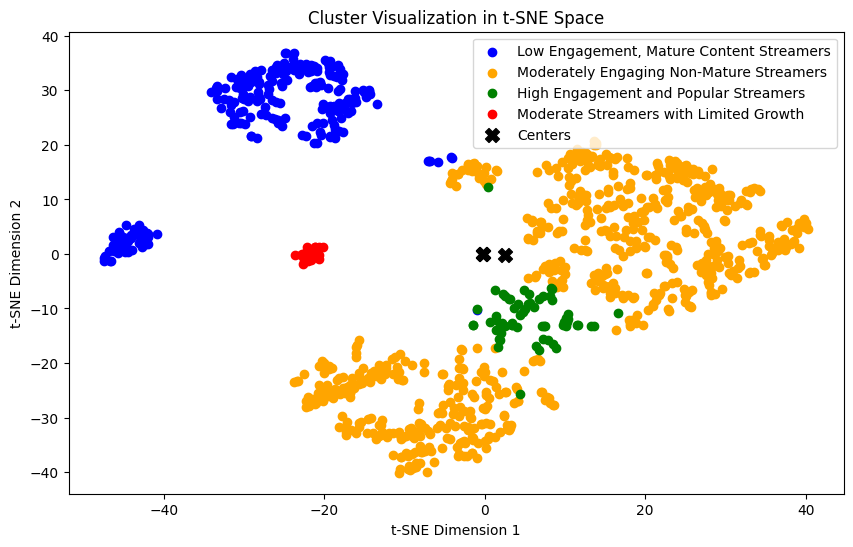

In [ ]:
from sklearn.manifold import TSNE

# Perform t-SNE
tsne = TSNE(n_components=2, random_state=42, perplexity=30)
data_tsne = tsne.fit_transform(data_standardized)

# Visualize clusters in t-SNE space
plt.figure(figsize=(10, 6))
for cluster, color in enumerate(colors):
    cluster_points = data_tsne[data['Cluster'] == cluster]
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], label=cluster_names[cluster], color=color)

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='black', marker='X', s=100, label='Centers')
plt.title('Cluster Visualization in t-SNE Space')
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.legend()
plt.show()


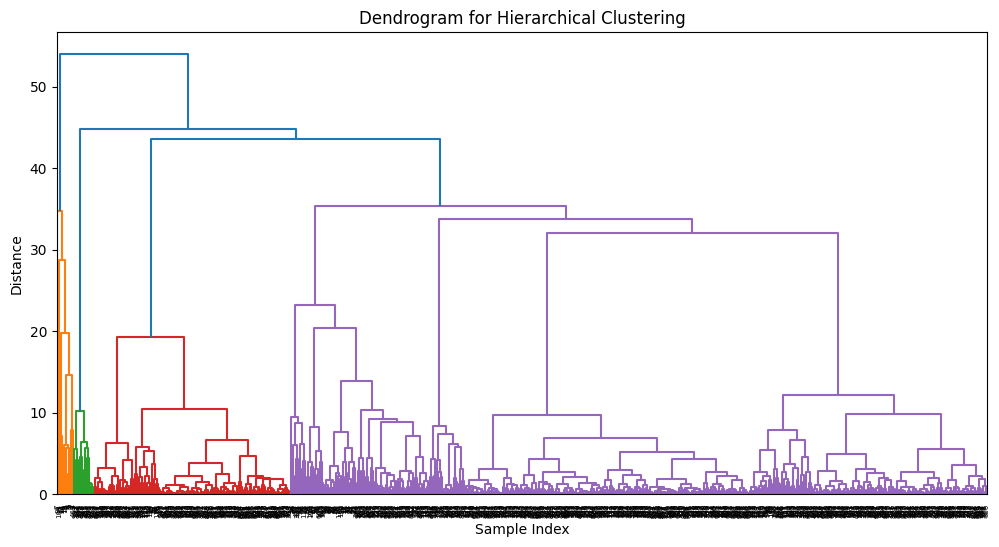

In [ ]:
from scipy.cluster.hierarchy import dendrogram, linkage

# Perform hierarchical clustering
linkage_matrix = linkage(data_standardized, method='ward')

# Plot dendrogram
plt.figure(figsize=(12, 6))
dendrogram(linkage_matrix)
plt.title('Dendrogram for Hierarchical Clustering')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.show()


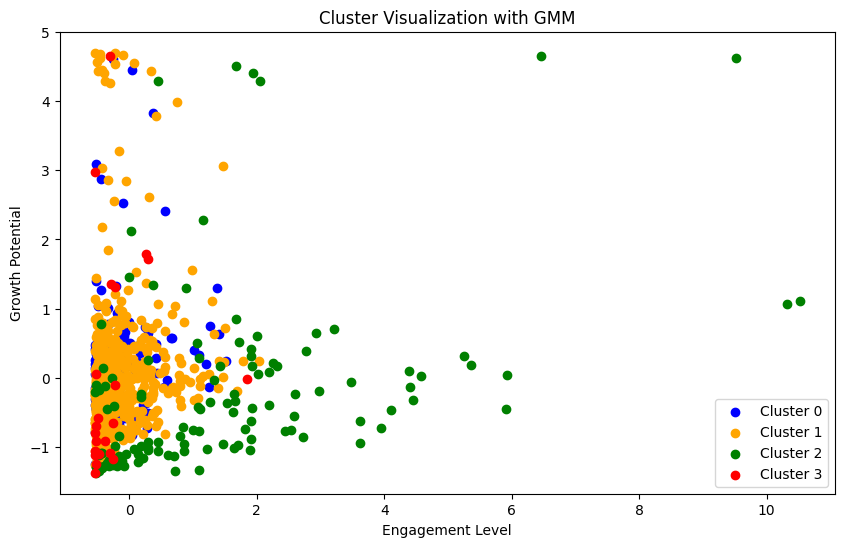

In [ ]:
from sklearn.mixture import GaussianMixture

# Fit Gaussian Mixture Model
gmm = GaussianMixture(n_components=4, random_state=42)
data['GMM Cluster'] = gmm.fit_predict(data_standardized)

# Visualize GMM clusters
plt.figure(figsize=(10, 6))
for cluster, color in enumerate(colors):
    cluster_points = data_standardized[data['GMM Cluster'] == cluster]
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], label=f'Cluster {cluster}', color=color)

plt.title('Cluster Visualization with GMM')
plt.xlabel(feature_1_name)
plt.ylabel(feature_2_name)
plt.legend()
plt.show()


In [ ]:
# Feature Engineering: Create new derived features
data['Engagement Ratio'] = data['Watch time(Minutes)'] / (data['Stream time(minutes)'] + 1)  # Avoid divide by zero
data['Popularity Score'] = data['Followers gained'] + data['Views gained']
data['Viewer Ratio'] = data['Peak viewers'] / (data['Average viewers'] + 1)  # Avoid divide by zero

In [ ]:
# Update the feature set for clustering
updated_features = ['Engagement Ratio', 'Popularity Score', 'Viewer Ratio',
                    'Watch time(Minutes)', 'Stream time(minutes)',
                    'Peak viewers', 'Average viewers']

scaler = StandardScaler()
updated_standardized = scaler.fit_transform(data[updated_features])


In [ ]:
# Apply KMeans clustering with the updated features
kmeans = KMeans(n_clusters=4, random_state=42)
data['Updated Cluster'] = kmeans.fit_predict(updated_standardized)

# Map cluster names for interpretation
updated_cluster_names = {
    0: "Consistent Performers",
    1: "Emerging Creators",
    2: "Top Performers",
    3: "Niche Specialists"
}
data['Updated Cluster Name'] = data['Updated Cluster'].map(updated_cluster_names)


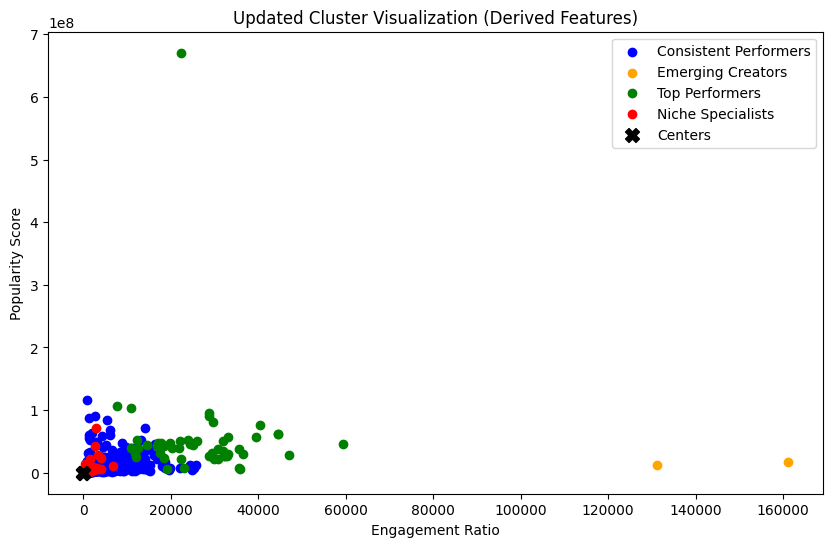

In [ ]:
# Scatter plot using derived features
plt.figure(figsize=(10, 6))
for cluster, color in enumerate(['blue', 'orange', 'green', 'red']):
    cluster_points = data[data['Updated Cluster'] == cluster]
    plt.scatter(cluster_points['Engagement Ratio'], cluster_points['Popularity Score'],
                label=updated_cluster_names[cluster], color=color)

# Mark cluster centers using Engagement Ratio and Popularity Score
updated_centers = kmeans.cluster_centers_
plt.scatter(updated_centers[:, 0], updated_centers[:, 1], c='black', marker='X', s=100, label='Centers')

plt.title('Updated Cluster Visualization (Derived Features)')
plt.xlabel('Engagement Ratio')
plt.ylabel('Popularity Score')
plt.legend()
plt.show()


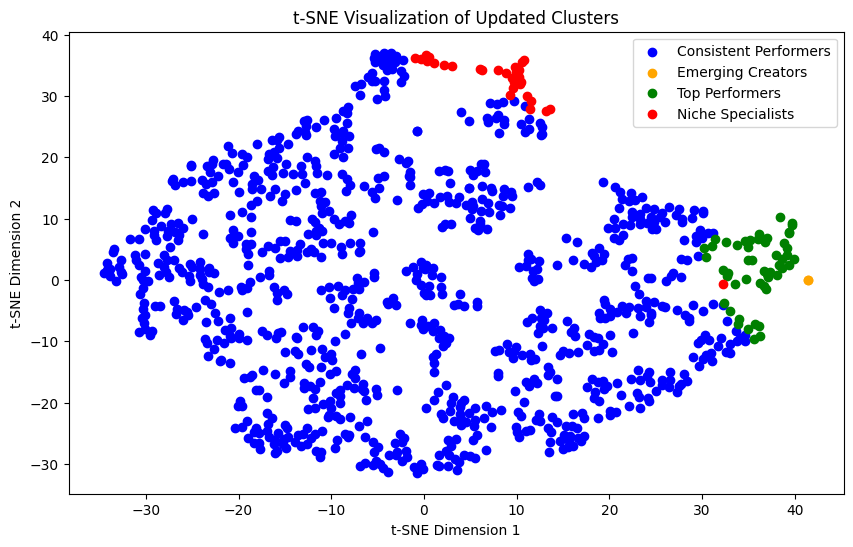

In [ ]:
from sklearn.manifold import TSNE

# Perform t-SNE
tsne = TSNE(n_components=2, random_state=42, perplexity=30)
updated_tsne = tsne.fit_transform(updated_standardized)

# Scatter plot in t-SNE space
plt.figure(figsize=(10, 6))
for cluster, color in enumerate(['blue', 'orange', 'green', 'red']):
    cluster_points = updated_tsne[data['Updated Cluster'] == cluster]
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1],
                label=updated_cluster_names[cluster], color=color)

plt.title('t-SNE Visualization of Updated Clusters')
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.legend()
plt.show()


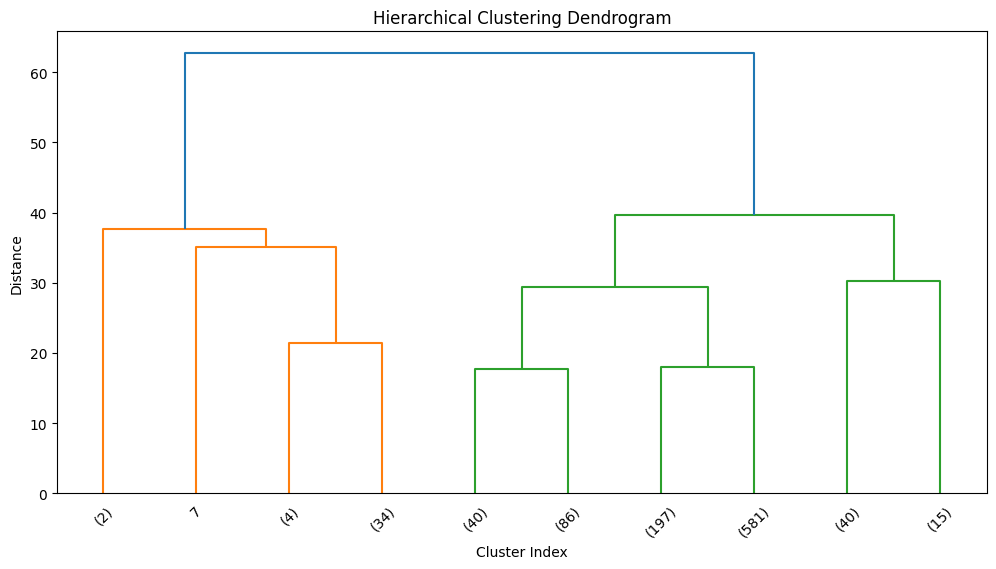

In [ ]:
from scipy.cluster.hierarchy import dendrogram, linkage

# Perform hierarchical clustering on updated features
linkage_matrix = linkage(updated_standardized, method='ward')

# Plot dendrogram
plt.figure(figsize=(12, 6))
dendrogram(linkage_matrix, truncate_mode='lastp', p=10, leaf_rotation=45, leaf_font_size=10)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Cluster Index')
plt.ylabel('Distance')
plt.show()